notebook para hacer el primer modelo de medellín. 

Experimento 1

In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [11]:
os.listdir("../data/Dengue_Dataset(Medellin).csv")

['Dataset Dengue (Espanol).pdf',
 'Dengue Dataset.pdf',
 'Dengue_Dataset(Medellin).csv',
 'dengue_data_all_municipalities.csv',
 'embeddings_medellin_100features.csv',
 'embeddings_medellin_200features.csv',
 'features_resnet50.csv',
 'features_transformer.csv',
 'pca_medellin_100features.csv',
 'pca_medellin_120features(10_per_band).csv']

In [13]:
data_path = os.path.join('..', 'data', 'Dengue_Dataset(Medellin).csv')
data_path

'..\\data\\Dengue_Dataset(Medellin).csv'

In [14]:
data = pd.read_csv(data_path)

In [16]:
data.head()

,cases_medellin,DATA,YEAR,YearWeek,LastDayWeek,MONTH,precipitation_medellin,precipitation_medellin_rural,precipitation_medellin_urbano,temperature
0,1,"['2007', 'w01']",2007,200701,2007-01-06,1,13.096688,14.097693,12.628933,19.615357
1,0,"['2007', 'w02']",2007,200702,2007-01-13,1,8.437044,6.910390,9.067214,22.234000
2,0,"['2007', 'w03']",2007,200703,2007-01-20,1,19.373165,21.616968,18.406665,22.268857
3,0,"['2007', 'w04']",2007,200704,2007-01-27,1,0.000000,0.000000,0.000000,23.546000
4,0,"['2007', 'w05']",2007,200705,2007-02-03,2,3.725206,3.144225,3.901021,25.353071


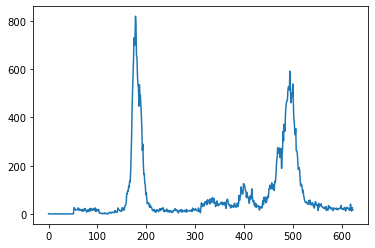

In [19]:
plt.plot(data["cases_medellin"])

# Regresión lineal

In [36]:
data.dtypes

cases_medellin                     int64
DATA                              object
YEAR                               int64
YearWeek                           int64
LastDayWeek                       object
MONTH                              int64
precipitation_medellin           float64
precipitation_medellin_rural     float64
precipitation_medellin_urbano    float64
temperature                      float64
dtype: object

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cases_medellin                 624 non-null    int64  
 1   DATA                           624 non-null    object 
 2   YEAR                           624 non-null    int64  
 3   YearWeek                       624 non-null    int64  
 4   LastDayWeek                    624 non-null    object 
 5   MONTH                          624 non-null    int64  
 6   precipitation_medellin         624 non-null    float64
 7   precipitation_medellin_rural   624 non-null    float64
 8   precipitation_medellin_urbano  624 non-null    float64
 9   temperature                    623 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 48.9+ KB


In [40]:
data.dropna(inplace=True)

In [41]:
for col in data:
    print(f"'{col}',")

'cases_medellin',
'DATA',
'YEAR',
'YearWeek',
'LastDayWeek',
'MONTH',
'precipitation_medellin',
'precipitation_medellin_rural',
'precipitation_medellin_urbano',
'temperature',


In [64]:
feature_cols = [
    'YEAR',
'precipitation_medellin',
'precipitation_medellin_rural',
'precipitation_medellin_urbano',
'temperature' ,
]

In [65]:
X_orig = data[feature_cols]

In [66]:
y = data['cases_medellin'].values

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

## Normalizar las variables de la matriz X
scaler.fit(X_orig)

X = scaler.transform(X_orig)


In [68]:
# Splitting the dataset into the Training set and Val set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 23)
print(X_train.shape)
print(X_val.shape)

(498, 5)
(125, 5)


In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
y_train_pred=lr.predict(X_train)
y_val_pred=lr.predict(X_val)


In [71]:
import sklearn.metrics as metrics
from math import sqrt 
# Métricas de evaluación.
metricas = {
  'MAE':  metrics.mean_absolute_error,
  'MSE':  metrics.mean_squared_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2':   metrics.r2_score}

In [72]:
reporte_train = {met: metricas[met](y_train, y_train_pred) for met in metricas}
reporte_train

<ipython-input-71-bb8441d961b3>:10: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(np.abs((y - y_pred) / y)) * 100,


{'MAE': 76.40504475135933,
 'MSE': 16651.376910418534,
 'RMSE': 129.04021431483494,
 'MAPE': inf,
 'R2': 0.04092268454328707}

In [73]:
reporte_val = {met: metricas[met](y_val, y_val_pred) for met in metricas}
reporte_val

<ipython-input-71-bb8441d961b3>:10: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(np.abs((y - y_pred) / y)) * 100,


{'MAE': 85.23633441287653,
 'MSE': 23191.674045877106,
 'RMSE': 152.28812838129275,
 'MAPE': inf,
 'R2': 0.012600355773423555}

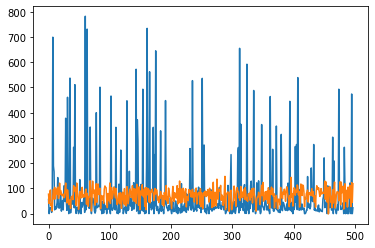

In [74]:
plt.plot(y_train)
plt.plot(y_train_pred)

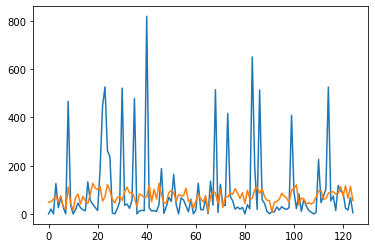

In [75]:
plt.plot(y_val)
plt.plot(y_val_pred)